In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




<center> <h1 style="background-color:purple; color:white" >Data Understanding</h1> 


    
<br>    
    
<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" style="background-color:purple; color:white" data-toggle="list"  role="tab" aria-controls="home">Notebook Content!</h3>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#libraries" role="tab" aria-controls="profile" style="color:purple">Import Libraries<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">1</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#load" role="tab" aria-controls="messages" style="color:purple">Load Data<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white"></span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#missing" role="tab" aria-controls="settings" style="color:purple">Missing Values<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#summary" role="tab" aria-controls="settings" style="color:purple">Summary Stats & Outlier Values<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#rfm" role="tab" aria-controls="settings" style="color:purple">RFM<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#visualize" role="tab" aria-controls="settings" style="color:purple"> Visualize<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">6</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#notebooks" role="tab" aria-controls="settings" style="color:purple"> My Notebooks<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white"></span></a>


<h1 style="color:purple" >Data Understanding of  <a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online Sales</a> </h1> 




<a id='libraries'></a>
<h1 style="color:purple" >1. Packages</h1> 

In [5]:
!pip install squarify
!pip install wordcloud
# ----------------------------
# BASE
import numpy as np 
from scipy import stats
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3 as sql
import seaborn as sns
import matplotlib.pyplot as plt
from string import ascii_letters
from sklearn import preprocessing
from wordcloud import WordCloud, STOPWORDS
# ----------------------------
# CONFIGURATION

sns.set_theme(style="white")

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

<a id='load'></a>
<h1 style="color:purple" >2. Data</h1> 

In [6]:
raw = pd.read_excel("/content/drive/MyDrive/freelancing/datawarehouse/Datawarehouse/Online Retail.xlsx")
raw

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


<h2> Connecting the dataframe with sqllite</h2>

In [7]:
conn = sql.connect('online_sales.db')
raw.to_sql('sales', conn)

table_name="sales"

<h2>Function of Sqllite which will be used for understanding the dataset</h2>

In [8]:
def max_value(conn,column,table_name):
  max_querry='SELECT MAX({0}) FROM  {1} ;'.format(column,table_name)
  return (pd.read_sql( max_querry,conn))

def min_value(conn,column,table_name):
  min_querry='SELECT MIN({0}) FROM  {1} ;'.format(column,table_name)
  return (pd.read_sql(min_querry,conn))

def mean_value(con,column,table_name):
  mean_querry='SELECT avg({0}) FROM  {1} ;'.format(column,table_name)
  return (pd.read_sql(mean_querry,conn))

def select_Column(conn,table_name,col_name):
  select_querry='SELECT {0} FROM {1};'.format(col_name,table_name)
  return(pd.read_sql(select_querry,conn))

def show_table_information(con,table_name,column='*'):
  show_querry='SELECT {0} FROM  {1} ;'.format(column,table_name)
  return (pd.read_sql(show_querry,conn))

def count_information(con,table_name,column='*'):
  count_querry='SELECT count({0}) FROM  {1} ;'.format(column,table_name)
  return (pd.read_sql(count_querry,conn))

<h2>Show table information</h2>

In [9]:
information=show_table_information(conn,table_name)
print("----Table Information------")
print(information)

----Table Information------
         index InvoiceNo StockCode                          Description  \
0            0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
541904  541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
541905  541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
541906  541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
541907  541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
541908  541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity          InvoiceDate  UnitPrice  CustomerID         Co

<h2>Showing information of columns in dataset</h2>

In [ ]:
information_count=count_information(conn,table_name)
print("----Count Table Information------")
print(information_count)

----Count Table Information------
   count(*)
0    541909


<a id='missing'></a>
<h1 style="color:purple" >3. Distribution Analysis</h1> 

<h4> Function tp plot the distribution of the columns</h4>

In [10]:
def plot_distribution(x,label,bins):
 
  plt.hist(x, bins=bins)
  plt.gca().set(title='Frequency Histogram'+str(label), ylabel='Frequency')

def barplot(data):
  courses = list(data.keys())
  value = list(data.values())
  values=[i[0] for i in value]
  fig = plt.figure(figsize = (10, 5))
 

  plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
  plt.xlabel("Countries")
  plt.ylabel("Countriesd")
  plt.title("Countrty COunt")
  plt.show()

-----Max Value of Unit Price::------
   MAX(UnitPrice)
0        38970.00
-----Min Value of Unit Price::------
   MIN(UnitPrice)
0       -11062.06
-----Median Value of Unit Price::------
   MIN(UnitPrice)
0       -11062.06


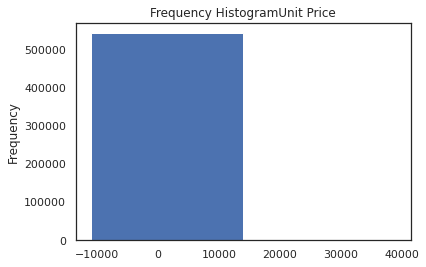

In [ ]:

plot_distribution(select_Column(conn,table_name,col_name="UnitPrice").values,"Unit Price",2)
print("-----Max Value of Unit Price::------")
print(max_value(conn,"UnitPrice",table_name))
print("-----Min Value of Unit Price::------")
print(min_value(conn,"UnitPrice",table_name))


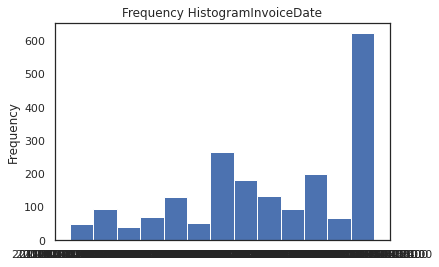

In [23]:
InvoiceDate=select_Column(conn,table_name,col_name="InvoiceDate").values
plot_distribution(InvoiceDate[:2000],"InvoiceDate","auto")

-----Max Value of Quantity::------
   MAX(Quantity)
0          80995
-----Min Value of Quantity::------
   MIN(Quantity)
0         -80995
-----Median Value of Quantit::------
   MIN(Quantity)
0         -80995


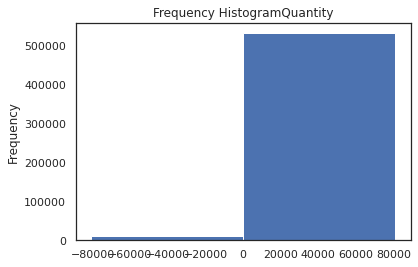

In [ ]:
plot_distribution(select_Column(conn,table_name,col_name="Quantity").values,"Quantity","auto")
print("-----Max Value of Quantity::------")
print(max_value(conn,"Quantity",table_name))
print("-----Min Value of Quantity::------")
print(min_value(conn,"Quantity",table_name))


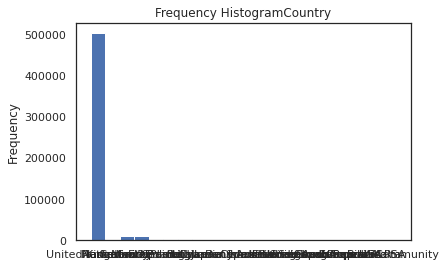

In [25]:
plot_distribution(select_Column(conn,table_name,col_name="Country").values,"Country","auto")
a="SELECT DISTINCT Country FROM sales;"
dict_country={}
pd.read_sql(a,conn)

for  i in pd.read_sql(a,conn).values:
    count_country="SELECT COUNT() FROM  sales WHERE COUNTRY='{}'".format(i[0])
    dict_country["Count of {} ::".format(i[0])]=pd.read_sql(count_country,conn).values[0]
    # print("Country Count",i[0],':',dict_country["Count of {} ::".format(i[0])])
    

# barplot(dict_country)

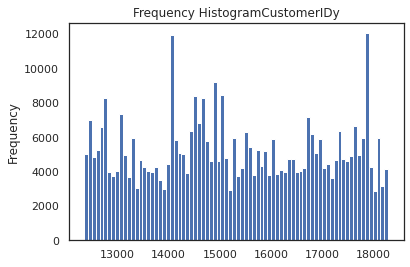

In [26]:
#CustomerID
plot_distribution(select_Column(conn,table_name,col_name="CustomerID").values,"CustomerIDy","auto")
# a1="SELECT DISTINCT CustomerID FROM sales;"
# dict_coutID={}
# # pd.read_sql(a1,conn)

# for  i in pd.read_sql(a1,conn).values:
#     count_country="SELECT COUNT() FROM  sales WHERE CustomerID='{}'".format(i[0])
#     dict_coutID["Count of {} ::".format(i[0])]=pd.read_sql(count_country,conn).values[0]
#     # print("CustomerID Count",i[0],':',dict_country["Count of {} ::".format(i[0])])
    

# barplot(dict_coutID)

-----Max Value of Quantity::------
   MAX(Quantity)
0          80995
-----Min Value of Quantity::------
   MIN(Quantity)
0         -80995


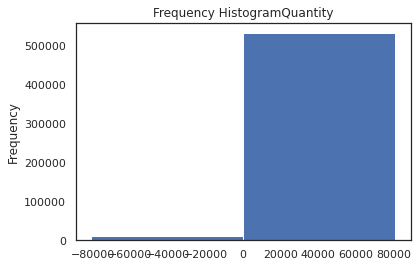

In [27]:
plot_distribution(select_Column(conn,table_name,col_name="Quantity").values,"Quantity",2)
print("-----Max Value of Quantity::------")
print(max_value(conn,"Quantity",table_name))
print("-----Min Value of Quantity::------")
print(min_value(conn,"Quantity",table_name))


In [50]:
#StockCode
plot_distribution(select_Column(conn,table_name,col_name="StockCode").values,"StockCode",2)
print("-----Max Value of StockCode::------")
print(max_value(conn,"StockCode",table_name))
print("-----Min Value of StockCode::------")
print(min_value(conn,"StockCode",table_name))


-----Max Value of StockCode::------
  MAX(StockCode)
0              m
-----Min Value of StockCode::------
  MIN(StockCode)
0          10002
-----Median Value of StockCode::------
  MIN(StockCode)
0          10002
Error in callback <function flush_figures at 0x7fca076bb3b0> (for post_execute):


KeyboardInterrupt: ignored

<h2> Correlation</h2>

In [9]:
Customer_ID=select_Column(conn,table_name,"CustomerID").values
InvoiceNo=select_Column(conn,table_name,"InvoiceNo").values
StockCode=select_Column(conn,table_name,"StockCode").values
Quantity=select_Column(conn,table_name,"Quantity").values
UnitPrice =select_Column(conn,table_name,"UnitPrice").values
Country=select_Column(conn,table_name,"Country").values
InvoiceDate=select_Column(conn,table_name,"InvoiceDate").values

In [10]:
Invoice_list=[i[0] for i in InvoiceNo]
StockCode_list=[i[0] for i in StockCode]
Quantity_list=[i[0] for i in Quantity]
UnitPrice_list=[i[0] for i in UnitPrice ]
Country_list=[i[0] for i in Country ]
Customer_ID_list=[i[0] for i in Customer_ID]
InvoiceDate_list=[i[0] for i in InvoiceDate]

In [11]:
print(len(Invoice_list))
print(len(StockCode_list))
print(len(UnitPrice_list))
print(len(Quantity_list))
print(len(Country_list))
print(len(Customer_ID_list))
print(len(StockCode_list))
print(len(InvoiceDate_list))


541909
541909
541909
541909
541909
541909
541909
541909


In [12]:
label_encoder = preprocessing.LabelEncoder()
country_encoded= label_encoder.fit_transform(Country_list)
Invoice_encoded= label_encoder.fit_transform(Invoice_list)
Customer_ID_encoded= label_encoder.fit_transform(Customer_ID_list)
StockCode_encoded= label_encoder.fit_transform(StockCode_list)
InvoiceDate_list_encoded= label_encoder.fit_transform(InvoiceDate_list)

In [13]:
dict_dataset = {"UnitPrice_list":UnitPrice_list ,
                "Quantity_list": Quantity_list,
                "Country_list":country_encoded,
               " Invoice_encoded":Invoice_encoded,
                "Customer_ID_encoded":Customer_ID_encoded,
                "StockCode_encoded":StockCode_encoded,
                "InvoiceDate_list_encoded":InvoiceDate_list_encoded
               } 
df = pd.DataFrame(dict_dataset)

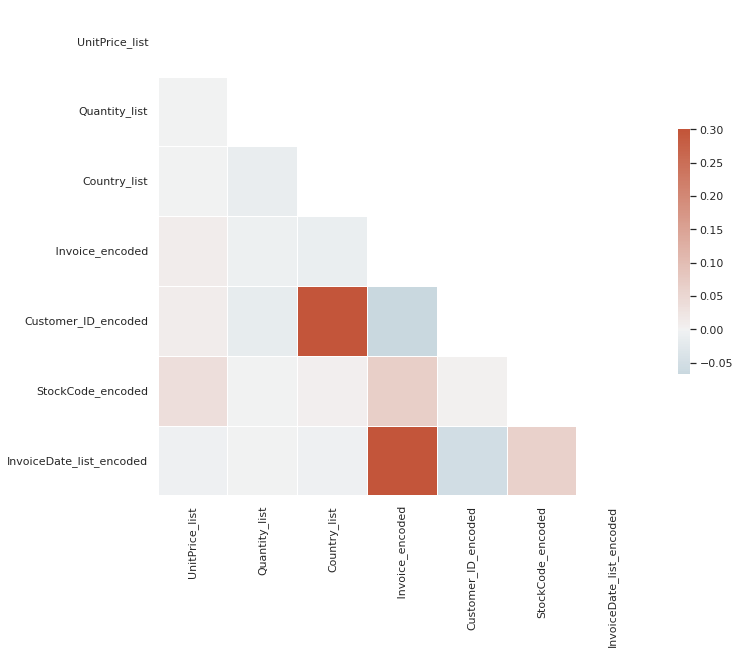

In [14]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<h2>Suitable Transformation<h2>

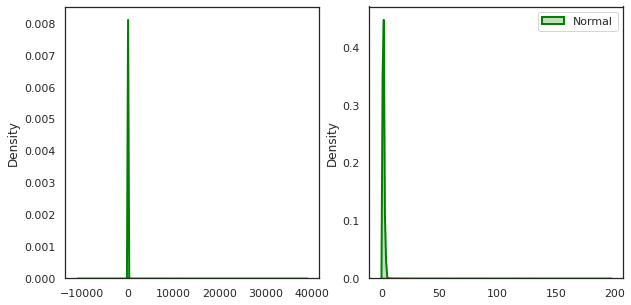

In [74]:
Customer_ID=select_Column(conn,table_name,"UnitPrice").values
Customer_ID_list=[i[0] for i in Customer_ID]
Customer_ID_list=np.asarray(Customer_ID_list)
Customer_ID_list=Customer_ID_list.reshape(len(Customer_ID_list),-1)
scaler = preprocessing.StandardScaler()
scaled_data=scaler.fit(Customer_ID_list) 

Customer_ID_list=[i[0] for i in Customer_ID]

fitted_data =  np.sqrt(Customer_ID_list)
  


fig, ax = plt.subplots(1, 2)
  


sns.distplot(Customer_ID_list, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])


plt.legend(loc = "upper right")


fig.set_figheight(5)
fig.set_figwidth(10)
  

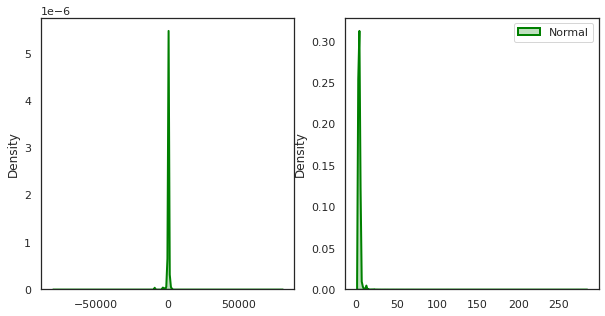

In [86]:
Customer_ID=select_Column(conn,table_name,"Quantity").values
Customer_ID_list=[i[0] for i in Customer_ID]
Customer_ID_list=np.asarray(Customer_ID_list)
Customer_ID_list=Customer_ID_list.reshape(len(Customer_ID_list),-1)
scaler = preprocessing.StandardScaler()
scaled_data=scaler.fit(Customer_ID_list) 

Customer_ID_list=[i[0] for i in Customer_ID]

fitted_data =  np.sqrt(Customer_ID_list)
  


fig, ax = plt.subplots(1, 2)
  


sns.distplot(Customer_ID_list, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])


plt.legend(loc = "upper right")


fig.set_figheight(5)
fig.set_figwidth(10)

<h2>Statistical Analysis</h2>

In [15]:
Customer_ID=select_Column(conn,table_name,"CustomerID").values
InvoiceNo=select_Column(conn,table_name,"InvoiceNo").values
StockCode=select_Column(conn,table_name,"StockCode").values
Quantity=select_Column(conn,table_name,"Quantity").values
UnitPrice =select_Column(conn,table_name,"UnitPrice").values
Country=select_Column(conn,table_name,"Country").values
InvoiceDate=select_Column(conn,table_name,"InvoiceDate").values
Description=select_Column(conn,table_name,"Description").values

In [16]:
Invoice_list=[i[0] for i in InvoiceNo]
StockCode_list=[i[0] for i in StockCode]
Quantity_list=[i[0] for i in Quantity]
UnitPrice_list=[i[0] for i in UnitPrice ]
Country_list=[i[0] for i in Country ]
Customer_ID_list=[i[0] for i in Customer_ID]
InvoiceDate_list=[i[0] for i in InvoiceDate]
Description_list=[i[0] for i in Description]

In [17]:
dict_dataset = {"UnitPrice_list":UnitPrice_list ,
                "Quantity_list": Quantity_list,
                "Country_list":Country_list,
               "Invoice_list":Invoice_list,
                "Customer_ID_list":Customer_ID_list,
                "StockCode_list":StockCode_list,
                "InvoiceDate_list_original":InvoiceDate_list
               } 
df = pd.DataFrame(dict_dataset)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   UnitPrice_list             541909 non-null  float64
 1   Quantity_list              541909 non-null  int64  
 2   Country_list               541909 non-null  object 
 3   Invoice_list               541909 non-null  object 
 4   Customer_ID_list           406829 non-null  float64
 5   StockCode_list             541909 non-null  object 
 6   InvoiceDate_list_original  541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [19]:
print("Number of transactions: ", df['Invoice_list'].nunique())
print("Number of products bought: ",df['StockCode_list'].nunique())
print("Number of customers:", df['Customer_ID_list'].nunique() )
print("Percentage of customers NA: ", round(df['Customer_ID_list'].isnull().sum() * 100 / len(df),2),"%" )
print('Number of countries: ',df['Country_list'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


In [20]:
df.describe()

,UnitPrice_list,Quantity_list,Customer_ID_list
count,541909.00,541909.00,406829.00
mean,4.61,9.55,15287.69
std,96.76,218.08,1713.60
min,-11062.06,-80995.00,12346.00
25%,1.25,1.00,13953.00
50%,2.08,3.00,15152.00
75%,4.13,10.00,16791.00
max,38970.00,80995.00,18287.00


In [21]:
#get canceled transactions
cancelled_orders = df[df['Invoice_list'].astype(str).str.contains('C')]
cancelled_orders.head()

,UnitPrice_list,Quantity_list,Country_list,Invoice_list,Customer_ID_list,StockCode_list,InvoiceDate_list_original
141,27.50,-1,United Kingdom,C536379,14527.00,D,2010-12-01 09:41:00
154,4.65,-1,United Kingdom,C536383,15311.00,35004C,2010-12-01 09:49:00
235,1.65,-12,United Kingdom,C536391,17548.00,22556,2010-12-01 10:24:00
236,0.29,-24,United Kingdom,C536391,17548.00,21984,2010-12-01 10:24:00
237,0.29,-24,United Kingdom,C536391,17548.00,21983,2010-12-01 10:24:00


In [22]:
print("We have ",len(cancelled_orders), " cancelled orders.")
total_orders = df['Invoice_list'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

We have  9288  cancelled orders.
Percentage of orders canceled: 9288/25900 (35.86%) 


In [23]:
temp_df =df.groupby(['Invoice_list','Customer_ID_list'],as_index=False)['InvoiceDate_list_original'].count()
transaction_df = temp_df.rename(columns = {'InvoiceDate_list_original':'Number of products'})
transaction_df.head()

,Invoice_list,Customer_ID_list,Number of products
0,536365,17850.00,7
1,536366,17850.00,2
2,536367,13047.00,12
3,536368,13047.00,4
4,536369,13047.00,1


In [24]:
transaction_df.describe()


,Customer_ID_list,Number of products
count,22190.00,22190.00
mean,15238.50,18.33
std,1733.15,23.89
min,12346.00,1.00
25%,13755.00,3.00
50%,15136.00,12.00
75%,16746.00,24.00
max,18287.00,542.00


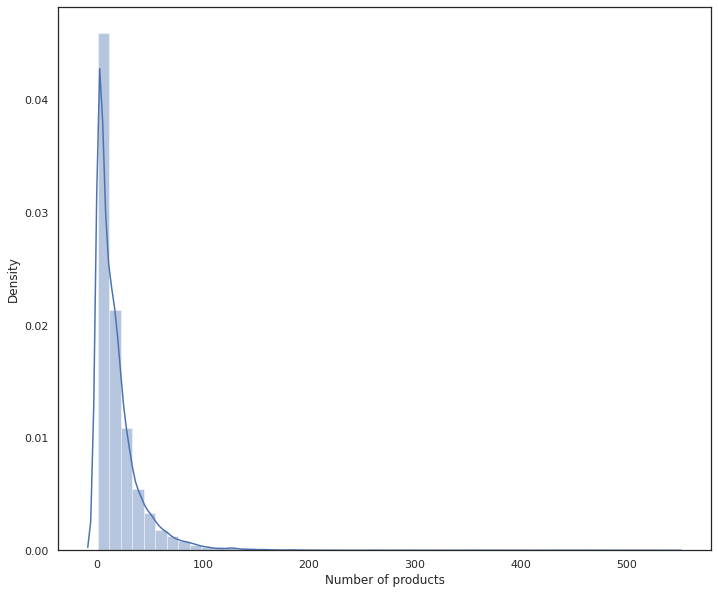

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sns.distplot(transaction_df['Number of products'],ax=ax)
plt.show()

In [26]:
df['total_cost'] = df['Quantity_list'] * df['UnitPrice_list']
df.head()

,UnitPrice_list,Quantity_list,Country_list,Invoice_list,Customer_ID_list,StockCode_list,InvoiceDate_list_original,total_cost
0,2.55,6,United Kingdom,536365,17850.00,85123A,2010-12-01 08:26:00,15.30
1,3.39,6,United Kingdom,536365,17850.00,71053,2010-12-01 08:26:00,20.34
2,2.75,8,United Kingdom,536365,17850.00,84406B,2010-12-01 08:26:00,22.00
3,3.39,6,United Kingdom,536365,17850.00,84029G,2010-12-01 08:26:00,20.34
4,3.39,6,United Kingdom,536365,17850.00,84029E,2010-12-01 08:26:00,20.34


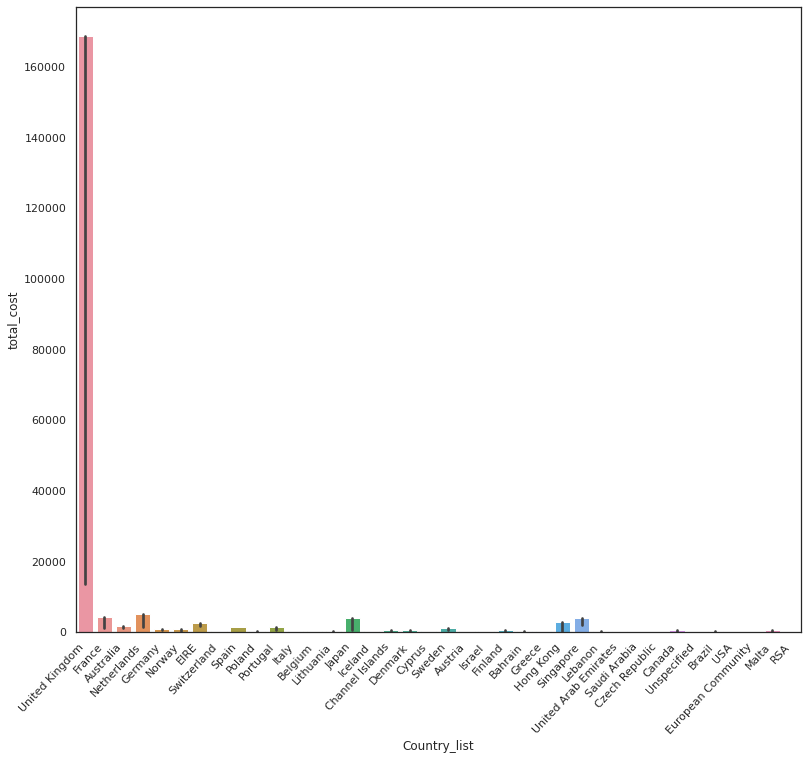

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country_list', y='total_cost',data=df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [ ]:
df.groupby('Country_list').sum().sort_values(by='total_cost', ascending=False)

,UnitPrice_list,Quantity_list,Customer_ID_list,total_cost
Country_list,,,,
United Kingdom,2245715.47,4263829,5626432595.00,8187806.36
Netherlands,6492.55,200128,34190538.00,284661.54
EIRE,48447.19,142637,110391745.00,263276.82
Germany,37666.00,117448,120075093.00,221698.21
France,43031.99,110480,107648864.00,197403.90
Australia,4054.75,83653,15693002.00,137077.27
Switzerland,6813.69,30325,23775916.00,56385.35
Spain,12633.45,26824,32689291.00,54774.58
Belgium,7540.13,23152,25718288.00,40910.96


In [ ]:
df[df['Country_list']=='United Kingdom']['Customer_ID_list'].nunique()

3950

In [ ]:
retail_uk =df[df['Country_list']=='United Kingdom']
retail_uk.describe()

,UnitPrice_list,Quantity_list,Customer_ID_list,total_cost
count,495478.00,495478.00,361878.00,495478.00
mean,4.53,8.61,15547.87,16.53
std,99.32,227.59,1594.40,394.84
min,-11062.06,-80995.00,12346.00,-168469.60
25%,1.25,1.00,14194.00,3.29
50%,2.10,3.00,15514.00,8.29
75%,4.13,10.00,16931.00,16.63
max,38970.00,80995.00,18287.00,168469.60


In [ ]:
print("Number of transactions: ", retail_uk['Invoice_list'].nunique())
print("Number of products bought: ",retail_uk['StockCode_list'].nunique())
print("Number of customers:", retail_uk['Customer_ID_list'].nunique() )
print("Percentage of customers NA: ", round(retail_uk['Customer_ID_list'].isnull().sum() * 100 / len(retail_uk),2),"%" )
print('Number of countries: ',retail_uk['Country_list'].nunique())

Number of transactions:  23494
Number of products bought:  4065
Number of customers: 3950
Percentage of customers NA:  26.96 %
Number of countries:  1


In [ ]:
groupedProduct = retail_uk.groupby('StockCode_list',as_index= False)['Quantity_list'].sum().sort_values(by='Quantity_list', ascending=False)
groupedProduct.head(10)

,StockCode_list,Quantity_list
1145,22197,52928
2995,84077,48326
3511,85099B,43167
3532,85123A,36706
3302,84879,33519
1528,22616,25307
452,21212,24702
1126,22178,23242
83,17003,22801
964,21977,20288


In [ ]:
invoice_quantity= retail_uk.groupby('Invoice_list', as_index=False)['Quantity_list'].sum().sort_values(by='Quantity_list', ascending=False)
invoice_quantity.head()

,Invoice_list,Quantity_list
20090,581483,80995
2136,541431,74215
17136,574941,14149
17765,576365,13956
13770,567423,12572


<h2>Data Visualisation</h2>

In [27]:
Customer_ID=select_Column(conn,table_name,"CustomerID").values
InvoiceNo=select_Column(conn,table_name,"InvoiceNo").values
StockCode=select_Column(conn,table_name,"StockCode").values
Quantity=select_Column(conn,table_name,"Quantity").values
UnitPrice =select_Column(conn,table_name,"UnitPrice").values
Country=select_Column(conn,table_name,"Country").values
InvoiceDate=select_Column(conn,table_name,"InvoiceDate").values
Description=select_Column(conn,table_name,"Description").values

In [28]:
Invoice_list=[i[0] for i in InvoiceNo]
StockCode_list=[i[0] for i in StockCode]
Quantity_list=[i[0] for i in Quantity]
UnitPrice_list=[i[0] for i in UnitPrice ]
Country_list=[i[0] for i in Country ]
Customer_ID_list=[i[0] for i in Customer_ID]
InvoiceDate_list=[i[0] for i in InvoiceDate]
Description_list=[i[0] for i in Description]

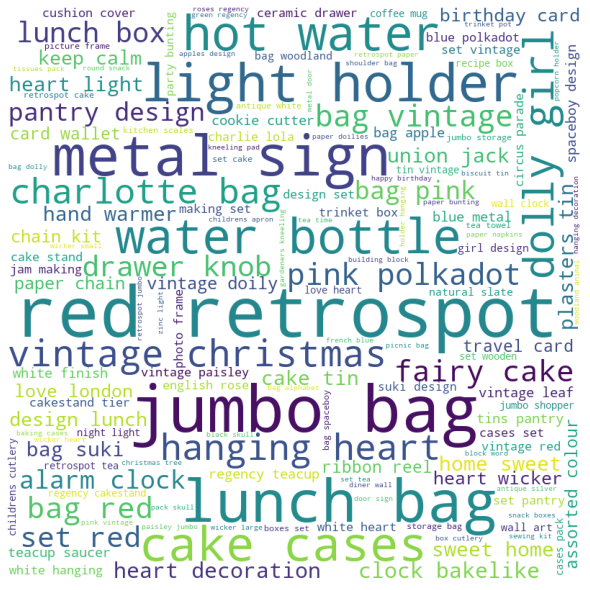

In [29]:
dict_description={
                  "Description_list":Description_list
                 }
df = pd.DataFrame(dict_description)
comment_words = ''
stopwords = set(STOPWORDS)

for val in df.Description_list:
     
    
    val = str(val)
 
    
    tokens = val.split()
     
   
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [30]:
Invoice_mark=[]
for i in Invoice_list:
  if i[0]=="c" or  i[0]=="C" :
    Invoice_mark.append("Returned")
  else:
    Invoice_mark.append("Buyed")


In [31]:
dict_dataset = {"UnitPrice_list":UnitPrice_list ,
                "Quantity_list": Quantity_list,
                "Country_list":Country_list,
               "Invoice_list":Invoice_list,
                "Customer_ID_list":Customer_ID_list,
                "StockCode_list":StockCode_list,
                "InvoiceDate_list_status":Invoice_mark,
                "InvoiceDate_list_original":pd.to_datetime(InvoiceDate_list)
               } 
df = pd.DataFrame(dict_dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   UnitPrice_list             541909 non-null  float64       
 1   Quantity_list              541909 non-null  int64         
 2   Country_list               541909 non-null  object        
 3   Invoice_list               541909 non-null  object        
 4   Customer_ID_list           406829 non-null  float64       
 5   StockCode_list             541909 non-null  object        
 6   InvoiceDate_list_status    541909 non-null  object        
 7   InvoiceDate_list_original  541909 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df

,UnitPrice_list,Quantity_list,Country_list,Invoice_list,Customer_ID_list,StockCode_list,InvoiceDate_list_status,InvoiceDate_list_original
0,2.55,6,United Kingdom,536365,17850.00,85123A,Buyed,2010-12-01 08:26:00
1,3.39,6,United Kingdom,536365,17850.00,71053,Buyed,2010-12-01 08:26:00
2,2.75,8,United Kingdom,536365,17850.00,84406B,Buyed,2010-12-01 08:26:00
3,3.39,6,United Kingdom,536365,17850.00,84029G,Buyed,2010-12-01 08:26:00
4,3.39,6,United Kingdom,536365,17850.00,84029E,Buyed,2010-12-01 08:26:00
...,...,...,...,...,...,...,...,...
541904,0.85,12,France,581587,12680.00,22613,Buyed,2011-12-09 12:50:00
541905,2.10,6,France,581587,12680.00,22899,Buyed,2011-12-09 12:50:00
541906,4.15,4,France,581587,12680.00,23254,Buyed,2011-12-09 12:50:00
541907,4.15,4,France,581587,12680.00,23255,Buyed,2011-12-09 12:50:00


In [ ]:
group_date=df.groupby("InvoiceDate_list_original")
group_date.head()


,UnitPrice_list,Quantity_list,Country_list,Invoice_list,Customer_ID_list,StockCode_list,InvoiceDate_list_status,InvoiceDate_list_original
0,2.55,6,United Kingdom,536365,17850.00,85123A,Buyed,2010-12-01 08:26:00
1,3.39,6,United Kingdom,536365,17850.00,71053,Buyed,2010-12-01 08:26:00
2,2.75,8,United Kingdom,536365,17850.00,84406B,Buyed,2010-12-01 08:26:00
3,3.39,6,United Kingdom,536365,17850.00,84029G,Buyed,2010-12-01 08:26:00
4,3.39,6,United Kingdom,536365,17850.00,84029E,Buyed,2010-12-01 08:26:00
...,...,...,...,...,...,...,...,...
541894,1.95,12,France,581587,12680.00,22631,Buyed,2011-12-09 12:50:00
541895,1.65,12,France,581587,12680.00,22556,Buyed,2011-12-09 12:50:00
541896,1.65,12,France,581587,12680.00,22555,Buyed,2011-12-09 12:50:00
541897,3.75,4,France,581587,12680.00,22728,Buyed,2011-12-09 12:50:00


In [ ]:
group_date.plot()
plt.xticks(rotation=45)
plt.show()

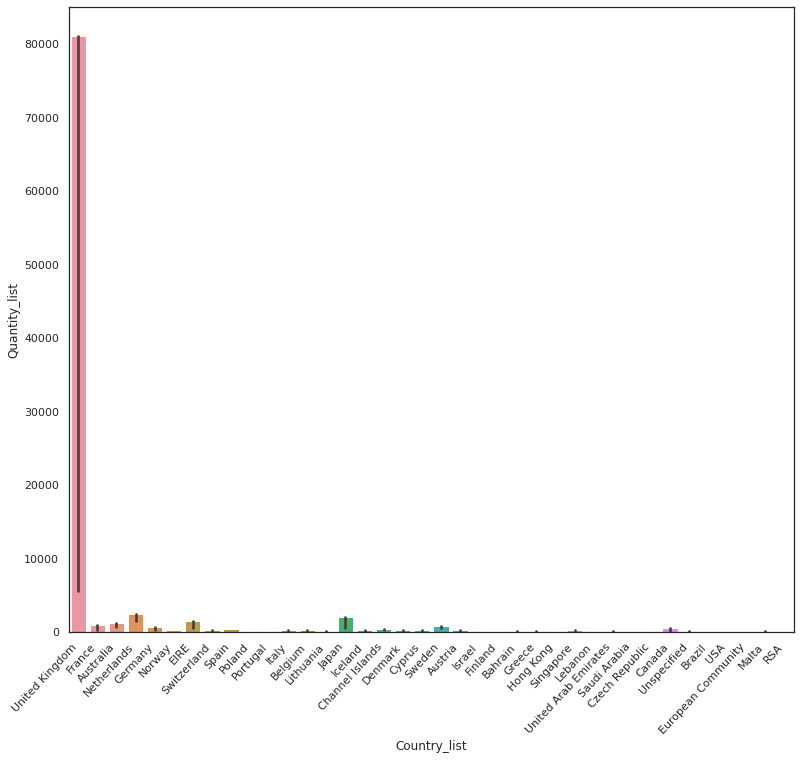

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country_list',y='Quantity_list',data=df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

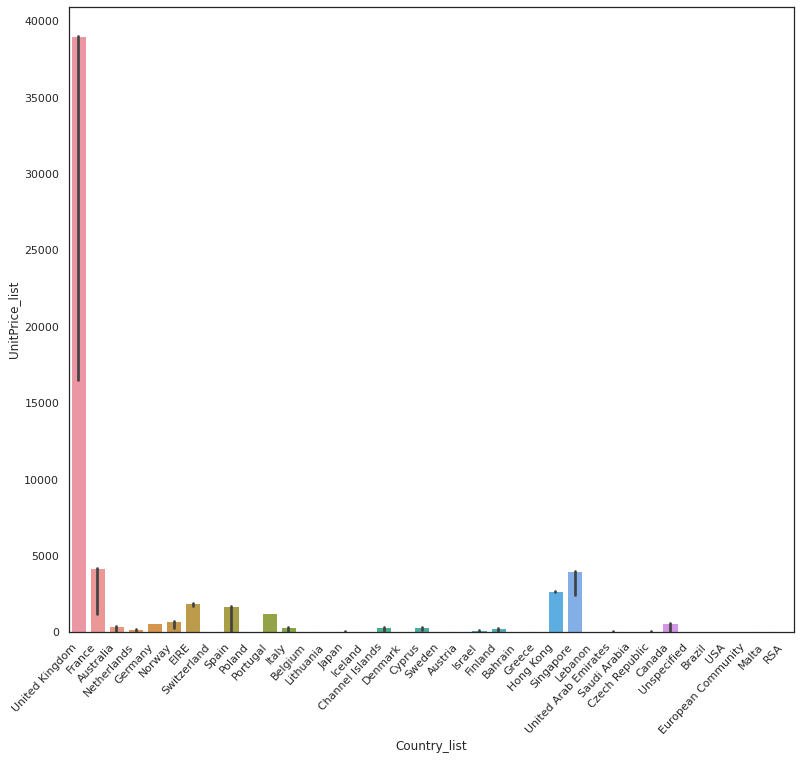

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country_list',y="UnitPrice_list",data=df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

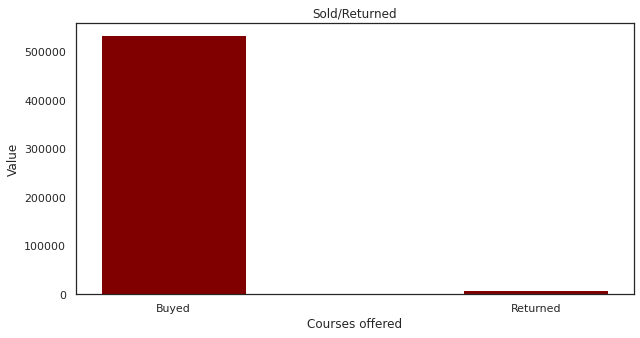

In [ ]:
counts = df["InvoiceDate_list_status"].value_counts().to_dict()

courses = list(counts.keys())
values = list(counts.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("Value")
plt.title("Sold/Returned")
plt.show()

In [ ]:
#date wise



<h2> Management of missing Values</h2>

In [ ]:
Customer_ID=select_Column(conn,table_name,"CustomerID").values
InvoiceNo=select_Column(conn,table_name,"InvoiceNo").values
StockCode=select_Column(conn,table_name,"StockCode").values
Quantity=select_Column(conn,table_name,"Quantity").values
UnitPrice =select_Column(conn,table_name,"UnitPrice").values
Country=select_Column(conn,table_name,"Country").values
InvoiceDate=select_Column(conn,table_name,"InvoiceDate").values
Description=select_Column(conn,table_name,"Description").values

In [ ]:
Invoice_list=[i[0] for i in InvoiceNo]
StockCode_list=[i[0] for i in StockCode]
Quantity_list=[i[0] for i in Quantity]
UnitPrice_list=[i[0] for i in UnitPrice ]
Country_list=[i[0] for i in Country ]
Customer_ID_list=[i[0] for i in Customer_ID]
InvoiceDate_list=[i[0] for i in InvoiceDate]
Description_list=[i[0] for i in Description]

In [ ]:
dict_dataset = {"UnitPrice_list":UnitPrice_list ,
                "Quantity_list": Quantity_list,
                "Country_list":Country_list,
               "Invoice_list":Invoice_list,
                "Customer_ID_list":Customer_ID_list,
                "StockCode_list":StockCode_list,
               "InvoiceDate_list_original":InvoiceDate_list
               } 
df = pd.DataFrame(dict_dataset)

In [ ]:
print("---------------------------Null values Count-----------------------------")
print(df.isnull().sum())
print("---------------------------Null values Percentage-----------------------------")
print(df.isnull().sum()/541909.)

---------------------------Null values Count-----------------------------
UnitPrice_list                    0
Quantity_list                     0
Country_list                      0
Invoice_list                      0
Customer_ID_list             135080
StockCode_list                    0
InvoiceDate_list_original         0
dtype: int64
---------------------------Null values Percentage-----------------------------
UnitPrice_list              0.00
Quantity_list               0.00
Country_list                0.00
Invoice_list                0.00
Customer_ID_list            0.25
StockCode_list              0.00
InvoiceDate_list_original   0.00
dtype: float64


In [ ]:
df=df.dropna()

In [ ]:
print("---------------------------Null values Count-----------------------------")
print(df.isnull().sum())


---------------------------Null values Count-----------------------------
UnitPrice_list               0
Quantity_list                0
Country_list                 0
Invoice_list                 0
Customer_ID_list             0
StockCode_list               0
InvoiceDate_list_original    0
dtype: int64
---------------------------Null values Percentage-----------------------------
UnitPrice_list              0.00
Quantity_list               0.00
Country_list                0.00
Invoice_list                0.00
Customer_ID_list            0.00
StockCode_list              0.00
InvoiceDate_list_original   0.00
dtype: float64
